In [110]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']
#df.describe()
df.head()
#df.info()
#df.isnull().sum()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [111]:
numeric_features = df.drop('Target', axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(numeric_features)

df.loc[:, numeric_features.columns] = scaled_features

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422


In [112]:
bins = [0, 0.2, 0.6, 1]
labels = ['New', 'Old', 'Very Old']

df['Age_Category'] = pd.cut(df['HouseAge'], bins=bins, labels=labels)
# Применение One-Hot Encoding
encoded_categories = pd.get_dummies(df['Age_Category'], dtype=int)

# Добавление столбцов в исходный DataFrame
df = pd.concat([df, encoded_categories.add_prefix('Age_Cat_')], axis=1)

# Удаление временного столбца категорий возраста домов
df.drop('Age_Category', axis=1, inplace=True)
df.head()




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,Age_Cat_New,Age_Cat_Old,Age_Cat_Very Old
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526,0,0,1
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585,0,1,0
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521,0,0,1
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413,0,0,1
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422,0,0,1


<Figure size 640x480 with 0 Axes>

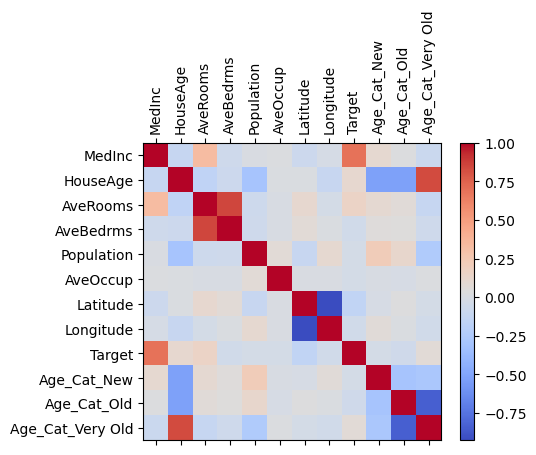

In [118]:



correlation_matrix = df.corr()

plt.tight_layout()
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(shrink=0.8)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.xticks(rotation=90)
plt.show()

Instruction : Analyse the relationship between Property Age and Price

More Detailed Hints:

Boolean Indexing for Age Groups:
New: Houses aged 10 years or less.
Old: Houses aged between 11 and 30 years.
Very Old: Houses aged more than 30 years.

Plotting Histograms:

Use matplotlib to plot a histogram that compares property age with its median value.


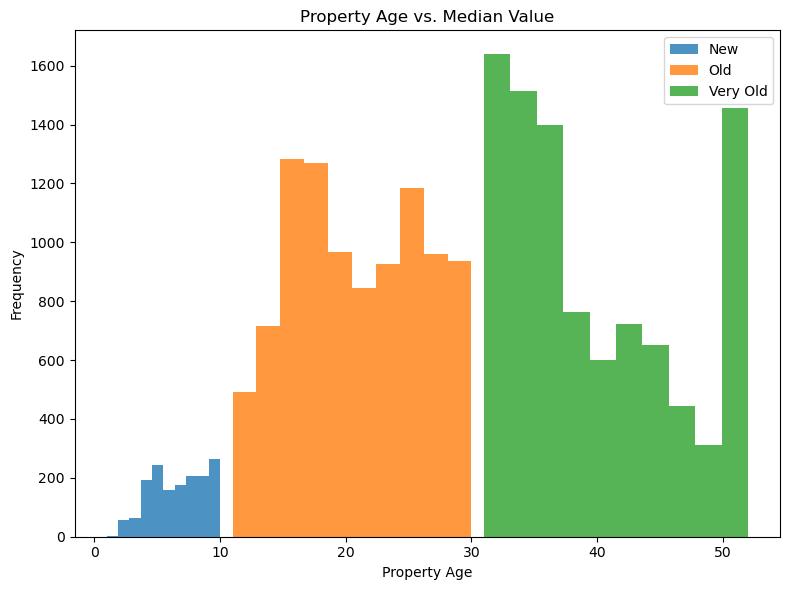

In [144]:
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']

new_condition = df['HouseAge'] <= 10
old_condition = (df['HouseAge'] >= 11) & (df['HouseAge'] <= 30)
very_old_condition = df['HouseAge'] > 30

plt.figure(figsize=(8, 6))

plt.hist(df.loc[new_condition, 'HouseAge'], alpha=0.8, label=f'New')
plt.hist(df.loc[old_condition, 'HouseAge'], alpha=0.8, label=f'Old')
plt.hist(df.loc[very_old_condition, 'HouseAge'], alpha=0.8, label=f'Very Old')

#age_price = encoded_categories.set_index(df['Target'].astype('int'))
#age_price = age_price.groupby('Target').sum()

plt.xlabel('Property Age')
plt.ylabel('Frequency')
plt.title('Property Age vs. Median Value')
plt.legend()
plt.tight_layout()
plt.show()